<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Transformation:-Combining-and-Structuring-Data" data-toc-modified-id="Data-Transformation:-Combining-and-Structuring-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Transformation: Combining and Structuring Data</a></span><ul class="toc-item"><li><span><a href="#Combining-Data" data-toc-modified-id="Combining-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Combining Data</a></span><ul class="toc-item"><li><span><a href="#concat" data-toc-modified-id="concat-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span><code>concat</code></a></span><ul class="toc-item"><li><span><a href="#axis=0" data-toc-modified-id="axis=0-1.1.1.1"><span class="toc-item-num">1.1.1.1&nbsp;&nbsp;</span><code>axis=0</code></a></span></li><li><span><a href="#axis=1" data-toc-modified-id="axis=1-1.1.1.2"><span class="toc-item-num">1.1.1.2&nbsp;&nbsp;</span><code>axis=1</code></a></span></li><li><span><a href="#join=&quot;inner&quot;" data-toc-modified-id="join=&quot;inner&quot;-1.1.1.3"><span class="toc-item-num">1.1.1.3&nbsp;&nbsp;</span><code>join="inner"</code></a></span></li></ul></li><li><span><a href="#merge" data-toc-modified-id="merge-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span><code>merge</code></a></span></li><li><span><a href="#join" data-toc-modified-id="join-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span><code>join</code></a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#💡-Check-for-understanding" data-toc-modified-id="💡-Check-for-understanding-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>💡 Check for understanding</a></span></li></ul></li><li><span><a href="#Structuring-Data-with-Pivot,-Stack/Unstack,-and-Melt" data-toc-modified-id="Structuring-Data-with-Pivot,-Stack/Unstack,-and-Melt-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Structuring Data with Pivot, Stack/Unstack, and Melt</a></span><ul class="toc-item"><li><span><a href="#Pivot" data-toc-modified-id="Pivot-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Pivot</a></span></li><li><span><a href="#Stack-and-Unstack" data-toc-modified-id="Stack-and-Unstack-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Stack and Unstack</a></span></li><li><span><a href="#Melt" data-toc-modified-id="Melt-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Melt</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#💡-Check-for-understanding" data-toc-modified-id="💡-Check-for-understanding-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>💡 Check for understanding</a></span></li></ul></li></ul></li></ul></div>

# Data Transformation: Combining and Structuring Data

## Combining Data

When working with data, you often encounter situations where you need to combine or merge multiple datasets to gain more insights or perform further analysis.

Pandas provides functions for [combining different data sets](http://pandas.pydata.org/pandas-docs/stable/merging.html) based on [relational algebra](https://en.wikipedia.org/wiki/Relational_algebra): `join`, `merge` and `concat`.

In [1]:
import pandas as pd

# DataFrame 1: Sales information
df_sales = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
    'Product': ['A', 'B', 'C', 'D'],
    'Quantity_Sold': [100, 200, 150, 120]
})

# DataFrame 2: Revenue information
df_revenue = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-05'],
    'Revenue': [1000, 1500, 1200, 800]
})

# DataFrame 3: Costs information
df_costs = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Costs': [500, 700, 600, 400]
})

# DataFrame 1: Sales information next 4 months
df_sales_2 = pd.DataFrame({
    'Date': ['2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08'],
    'Product': ['A', 'B', 'C', 'D'],
    'Quantity_Sold': [100, 200, 150, 120]
})

In [2]:
df_sales

,Date,Product,Quantity_Sold
0,2023-01-01,A,100
1,2023-01-02,B,200
2,2023-01-03,C,150
3,2023-01-04,D,120


In [4]:
df_sales_2

,Date,Product,Quantity_Sold
0,2023-01-05,A,100
1,2023-01-06,B,200
2,2023-01-07,C,150
3,2023-01-08,D,120


In [5]:
df_revenue

,Date,Revenue
0,2023-01-01,1000
1,2023-01-02,1500
2,2023-01-03,1200
3,2023-01-05,800


In [6]:
df_costs

,Date,Costs
0,2023-01-01,500
1,2023-01-03,700
2,2023-01-04,600
3,2023-01-05,400


### `concat`

- `concat` is usually used when you want to combine two or more DataFrames vertically or horizontally.
- It is commonly used when you have data split across multiple files or sources and want to stack them together to create a larger dataset.
- Vertical concatenation is used when you want to add more rows to an existing DataFrame
- Horizontal concatenation is used when you want to add more columns to an existing DataFrame.
- Example: combining monthly or yearly sales data: Suppose you have sales data for a retail store split across multiple files, where each file contains sales data for a specific month or year. You can use concat to vertically stack these DataFrames and create a single DataFrame containing the complete sales data for all months or years.

`pd.concat` is used to concatenate multiple DataFrames.
- The `axis` parameter determines the axis along which the DataFrames will be stacked. `axis=0` (the default) stacks the DataFrames vertically (along rows), while `axis=1` stacks them horizontally (along columns).

#### `axis=0`

In [8]:
pd.concat([df_sales, df_sales_2])

,Date,Product,Quantity_Sold
0,2023-01-01,A,100
1,2023-01-02,B,200
2,2023-01-03,C,150
3,2023-01-04,D,120
0,2023-01-05,A,100
1,2023-01-06,B,200
2,2023-01-07,C,150
3,2023-01-08,D,120


In [9]:
pd.concat([df_sales, df_sales_2], axis=0)

,Date,Product,Quantity_Sold
0,2023-01-01,A,100
1,2023-01-02,B,200
2,2023-01-03,C,150
3,2023-01-04,D,120
0,2023-01-05,A,100
1,2023-01-06,B,200
2,2023-01-07,C,150
3,2023-01-08,D,120


In [10]:
pd.concat([df_sales, df_costs], axis=0)

,Date,Product,Quantity_Sold,Costs
0,2023-01-01,A,100.0,NaN
1,2023-01-02,B,200.0,NaN
2,2023-01-03,C,150.0,NaN
3,2023-01-04,D,120.0,NaN
0,2023-01-01,NaN,NaN,500.0
1,2023-01-03,NaN,NaN,700.0
2,2023-01-04,NaN,NaN,600.0
3,2023-01-05,NaN,NaN,400.0


#### `axis=1`

In [14]:
data = pd.concat([df_sales, df_costs], axis=1)

data

,Date,Product,Quantity_Sold,Date,Costs
0,2023-01-01,A,100,2023-01-01,500
1,2023-01-02,B,200,2023-01-03,700
2,2023-01-03,C,150,2023-01-04,600
3,2023-01-04,D,120,2023-01-05,400


In [15]:
data['Date']

,Date,Date
0,2023-01-01,2023-01-01
1,2023-01-02,2023-01-03
2,2023-01-03,2023-01-04
3,2023-01-04,2023-01-05


#### `join="inner"`

- `Join` Parameter:
    - The `join` parameter is used to specify how to handle the overlapping columns during concatenation.
    - By default (`join='outer'`), all columns from all DataFrames are included in the result, and missing values are filled with NaN.
    - If `join='inner'`, only the overlapping columns are included in the result, and non-overlapping columns are excluded.


In [25]:
pd.concat([df_sales, df_sales_2], join='inner', axis=0)

,Date,Product,Quantity_Sold
0,2023-01-01,A,100
1,2023-01-02,B,200
2,2023-01-03,C,150
3,2023-01-04,D,120
0,2023-01-05,A,100
1,2023-01-06,B,200
2,2023-01-07,C,150
3,2023-01-08,D,120


In [29]:
pd.concat([df_sales, df_revenue, df_costs], join='outer')

,Date,Product,Quantity_Sold,Revenue,Costs
0,2023-01-01,A,100.0,NaN,NaN
1,2023-01-02,B,200.0,NaN,NaN
2,2023-01-03,C,150.0,NaN,NaN
3,2023-01-04,D,120.0,NaN,NaN
0,2023-01-01,NaN,NaN,1000.0,NaN
1,2023-01-02,NaN,NaN,1500.0,NaN
2,2023-01-03,NaN,NaN,1200.0,NaN
3,2023-01-05,NaN,NaN,800.0,NaN
0,2023-01-01,NaN,NaN,NaN,500.0
1,2023-01-03,NaN,NaN,NaN,700.0


In [30]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)


In [31]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [33]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)


df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [35]:
pd.concat([df1, df4], axis=1, join="outer")

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [36]:
pd.concat([df_sales, df_costs], join='inner', axis=1)

,Date,Product,Quantity_Sold,Date,Costs
0,2023-01-01,A,100,2023-01-01,500
1,2023-01-02,B,200,2023-01-03,700
2,2023-01-03,C,150,2023-01-04,600
3,2023-01-04,D,120,2023-01-05,400


In [37]:
pd.concat([df_sales, df_costs], join='outer', axis=1)

,Date,Product,Quantity_Sold,Date,Costs
0,2023-01-01,A,100,2023-01-01,500
1,2023-01-02,B,200,2023-01-03,700
2,2023-01-03,C,150,2023-01-04,600
3,2023-01-04,D,120,2023-01-05,400


### `merge`

Merge is used to combine DataFrames based on a common column. By default, `merge` performs an *inner join*, where only the matching rows between the DataFrames are included in the result.

In [38]:
pd.merge(df_sales, df_costs, on='Date')   # inner join  interseccion

,Date,Product,Quantity_Sold,Costs
0,2023-01-01,A,100,500
1,2023-01-03,C,150,700
2,2023-01-04,D,120,600


If you want to perform an outer join, where all rows from both DataFrames are included, you can use `how='outer'`.

In [46]:
df_sales

,Date,Product,Quantity_Sold
0,2023-01-01,A,100
1,2023-01-02,B,200
2,2023-01-03,C,150
3,2023-01-04,D,120


In [47]:
df_costs

,Date,Costs
0,2023-01-01,500
1,2023-01-03,700
2,2023-01-04,600
3,2023-01-05,400


In [40]:
pd.merge(df_sales, df_costs, on='Date', how='outer')  # outer join

,Date,Product,Quantity_Sold,Costs
0,2023-01-01,A,100.0,500.0
1,2023-01-02,B,200.0,NaN
2,2023-01-03,C,150.0,700.0
3,2023-01-04,D,120.0,600.0
4,2023-01-05,NaN,NaN,400.0


If you want to include all rows from the left DataFrame and only the matching rows from the right DataFrame, you can use `how='left'`.

In [43]:
pd.merge(df_sales, df_costs, on='Date', how='left')  # left join

,Date,Product,Quantity_Sold,Costs
0,2023-01-01,A,100,500.0
1,2023-01-02,B,200,NaN
2,2023-01-03,C,150,700.0
3,2023-01-04,D,120,600.0


Similarly, if you want to include all rows from the right DataFrame and only the matching rows from the left DataFrame, you can use `how='right'`.

In [45]:
pd.merge(df_sales, df_costs, on='Date', how='right')  # right join

,Date,Product,Quantity_Sold,Costs
0,2023-01-01,A,100.0,500
1,2023-01-03,C,150.0,700
2,2023-01-04,D,120.0,600
3,2023-01-05,NaN,NaN,400


In [48]:
total = pd.merge(df_sales, df_costs, on='Date', how='right')   # de 2 en 2

total

,Date,Product,Quantity_Sold,Costs
0,2023-01-01,A,100.0,500
1,2023-01-03,C,150.0,700
2,2023-01-04,D,120.0,600
3,2023-01-05,NaN,NaN,400


In these examples, we had the same column ('Date') in both DataFrames, but this is not always the case. To perform such joins, we use the `left_on` and `right_on` parameters.

`df1.merge(df2, left_on='col_1', right_on='col_2', how='inner')`

### `join`

`join()` works similarly to `merge()`. It is also used to combine DataFrames. However, there are some differences between the two:

1. **Method of Combination:**
   - `join()`: Combines DataFrames **based on their indexes**. It uses the index as the key to align the rows.
   - `merge()`: Combines DataFrames **based on the values in specified columns**. It can use one or more columns as the keys to align the rows.

2. **Default Behavior:**
   - `join()`: By default, performs a left join, keeping all rows from the left DataFrame and filling missing values with NaN from the right DataFrame.
   - `merge()`: By default, performs an inner join, keeping only the rows with matching values in both DataFrames.



First, we set the 'Date' column as the index for all three DataFrames, as follows:

In [52]:
df_sales.set_index('Date')

,Product,Quantity_Sold
Date,,
2023-01-01,A,100
2023-01-02,B,200
2023-01-03,C,150
2023-01-04,D,120


In [53]:
#df.index = df.Date

In [54]:
df_sales.set_index('Date', inplace=True)
df_revenue.set_index('Date', inplace=True)
df_costs.set_index('Date', inplace=True)

In [55]:
df_costs

,Costs
Date,
2023-01-01,500
2023-01-03,700
2023-01-04,600
2023-01-05,400


Next, we use the `join()` method on `df_sales` to merge it with `df_revenue` and `df_costs`. By default, `join()` uses the 'Date' column as the key to merge the DataFrames.

The resulting df_combined DataFrame will contain all rows from df_sales along with corresponding revenue and costs information, where available. If there is no data for a specific date in either df_revenue or df_costs, the corresponding values will be filled with NaN.

In [62]:
#çhelp(df_sales.join)

In [63]:
df_sales.join(df_costs, how='left')

,Product,Quantity_Sold,Costs
Date,,,
2023-01-01,A,100,500.0
2023-01-02,B,200,NaN
2023-01-03,C,150,700.0
2023-01-04,D,120,600.0


In [64]:
df_sales.join(df_costs, how='right')

,Product,Quantity_Sold,Costs
Date,,,
2023-01-01,A,100.0,500
2023-01-03,C,150.0,700
2023-01-04,D,120.0,600
2023-01-05,NaN,NaN,400


In [65]:
df_sales.join(df_costs, how='inner')

,Product,Quantity_Sold,Costs
Date,,,
2023-01-01,A,100,500
2023-01-03,C,150,700
2023-01-04,D,120,600


In [66]:
df_sales.join(df_costs, how='outer')

,Product,Quantity_Sold,Costs
Date,,,
2023-01-01,A,100.0,500.0
2023-01-02,B,200.0,NaN
2023-01-03,C,150.0,700.0
2023-01-04,D,120.0,600.0
2023-01-05,NaN,NaN,400.0


In [67]:
df_sales.join([df_costs, df_revenue], how='outer')  # con tres tablas juntando por el indice

,Product,Quantity_Sold,Costs,Revenue
Date,,,,
2023-01-01,A,100.0,500.0,1000.0
2023-01-02,B,200.0,NaN,1500.0
2023-01-03,C,150.0,700.0,1200.0
2023-01-04,D,120.0,600.0,NaN
2023-01-05,NaN,NaN,400.0,800.0


In [68]:
df_sales.join([df_costs, df_revenue], how='outer').reset_index()

,Date,Product,Quantity_Sold,Costs,Revenue
0,2023-01-01,A,100.0,500.0,1000.0
1,2023-01-02,B,200.0,NaN,1500.0
2,2023-01-03,C,150.0,700.0,1200.0
3,2023-01-04,D,120.0,600.0,NaN
4,2023-01-05,NaN,NaN,400.0,800.0


### Summary

- `concat` is used to combine two or more DataFrames vertically or horizontally. It's often used when data is split across multiple files and you want to create a larger dataset.
  - Vertical concatenation adds more rows to a DataFrame.
  - Horizontal concatenation adds more columns to a DataFrame.
  - `pd.concat` is used with the `axis` parameter determining the axis along which the DataFrames will be stacked (`axis=0` for rows and `axis=1` for columns).
  - The `join` parameter determines how to handle overlapping columns during concatenation. `join='outer'` includes all columns and fills missing values with NaN, while `join='inner'` includes only overlapping columns.
- `merge` is used to combine DataFrames based on a common column.
  - By default, `merge` performs an inner join, including only the matching rows between the DataFrames.
  - `how='outer'` performs an outer join, including all rows from both DataFrames.
  - `how='left'` performs a left join, including all rows from the left DataFrame and only matching rows from the right.
  - `how='right'` performs a right join, including all rows from the right DataFrame and only matching rows from the left.
  - If the columns to join on don't have the same name, `left_on` and `right_on` parameters are used.
- `join` is used to combine DataFrames based on their indexes.
  - By default, `join` performs a left join.
  - The DataFrame's index can be set using `set_index` and then `join` can be used to merge on this index.
  - Different types of joins (inner, outer) can be performed using the `how` parameter in the `join` function.

## Structuring Data with Pivot, Stack/Unstack, and Melt

These methods are useful for restructuring, aggregating, and reshaping data to better analyze and visualize it.

### Pivot

- Pivot is used to create a new derived table from another one.
- Allows us to reshape a DataFrame based on column values.
- Converts unique values from one column into multiple columns.

![](https://github.com/data-bootcamp-v4/lessons/blob/main/img/pivot.png?raw=true)

In [69]:
import pandas as pd

# Load Chipotle dataset from an online source
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/worldstats.csv'

df = pd.read_csv(url)

In [70]:
df.head()

,country,year,Population,GDP
0,Arab World,2015,392022276.0,2.530102e+12
1,Arab World,2014,384222592.0,2.873600e+12
2,Arab World,2013,376504253.0,2.846994e+12
3,Arab World,2012,368802611.0,2.773270e+12
4,Arab World,2011,361031820.0,2.497945e+12


In [73]:
df.pivot_table(index='country',   # paises por filas, valores unicos
               columns='year',   # años por columnas, valores unicos
               values=['GDP'],   # PIB como valores,
               aggfunc='sum'
              )

GDP                                            \
year                        1960          1961          1962          1963   
country                                                                      
Afghanistan         5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08   
Albania                      NaN           NaN           NaN           NaN   
Algeria             2.723638e+09  2.434767e+09  2.001461e+09  2.703004e+09   
Andorra                      NaN           NaN           NaN           NaN   
Angola                       NaN           NaN           NaN           NaN   
...                          ...           ...           ...           ...   
West Bank and Gaza           NaN           NaN           NaN           NaN   
World               1.364643e+12  1.420440e+12  1.524573e+12  1.638187e+12   
Yemen, Rep.                  NaN           NaN           NaN           NaN   
Zambia              6.987397e+08  6.823597e+08  6.792797e+08  7.043397e+08   
Zimbabwe            1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09   

                                                                            \
year                        1964          1965          1966          1967   
country                                                                      
Afghanistan         8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09   
Albania                      NaN           NaN           NaN           NaN   
Algeria             2.909340e+09  3.136284e+09  3.039859e+09  3.370870e+09   
Andorra                      NaN           NaN           NaN           NaN   
Angola                       NaN           NaN           NaN           NaN   
...                          ...           ...           ...           ...   
West Bank and Gaza           NaN           NaN           NaN           NaN   
World               1.799675e+12  1.959900e+12  2.125397e+12  2.262923e+12   
Yemen, Rep.                  NaN           NaN           NaN           NaN   
Zambia              8.226397e+08  1.061200e+09  1.239000e+09  1.340639e+09   
Zimbabwe            1.217138e+09  1.311436e+09  1.281750e+09  1.397002e+09   

                                                ...                \
year                        1968          1969  ...          2006   
country                                         ...                 
Afghanistan         1.373333e+09  1.408889e+09  ...  7.057598e+09   
Albania                      NaN           NaN  ...  8.992642e+09   
Algeria             3.852147e+09  4.257253e+09  ...  1.170273e+11   
Andorra                      NaN           NaN  ...  3.536452e+09   
Angola                       NaN           NaN  ...  4.178948e+10   
...                          ...           ...  ...           ...   
West Bank and Gaza           NaN           NaN  ...  4.910100e+09   
World               2.440549e+12  2.686747e+12  ...  5.107451e+13   
Yemen, Rep.                  NaN           NaN  ...  1.908173e+10   
Zambia              1.573739e+09  1.926399e+09  ...  1.275686e+10   
Zimbabwe            1.479600e+09  1.747999e+09  ...  5.443896e+09   

                                                                            \
year                        2007          2008          2009          2010   
country                                                                      
Afghanistan         9.843842e+09  1.019053e+10  1.248694e+10  1.593680e+10   
Albania             1.070101e+10  1.288135e+10  1.204421e+10  1.192695e+10   
Algeria             1.349771e+11  1.710007e+11  1.372110e+11  1.612073e+11   
Andorra             4.010785e+09  4.001349e+09  3.649863e+09  3.346317e+09   
Angola              6.044892e+10  8.417803e+10  7.549238e+10  8.247091e+10   
...                          ...           ...           ...           ...   
West Bank and Gaza  5.505800e+09  6.673500e+09  7.268200e+09  8.913100e+09   
World               5.758343e+13  6.312856e+13  5.983553e+13  6.564782e+13   
Yemen, Rep.       

In [74]:
df.pivot_table(index='country',   # paises por filas, valores unicos
               columns='year',   # años por columnas, valores unicos
               values=['GDP'],   # PIB como valores,
               aggfunc='mean'
              )

GDP                                            \
year                        1960          1961          1962          1963   
country                                                                      
Afghanistan         5.377778e+08  5.488889e+08  5.466667e+08  7.511112e+08   
Albania                      NaN           NaN           NaN           NaN   
Algeria             2.723638e+09  2.434767e+09  2.001461e+09  2.703004e+09   
Andorra                      NaN           NaN           NaN           NaN   
Angola                       NaN           NaN           NaN           NaN   
...                          ...           ...           ...           ...   
West Bank and Gaza           NaN           NaN           NaN           NaN   
World               1.364643e+12  1.420440e+12  1.524573e+12  1.638187e+12   
Yemen, Rep.                  NaN           NaN           NaN           NaN   
Zambia              6.987397e+08  6.823597e+08  6.792797e+08  7.043397e+08   
Zimbabwe            1.052990e+09  1.096647e+09  1.117602e+09  1.159512e+09   

                                                                            \
year                        1964          1965          1966          1967   
country                                                                      
Afghanistan         8.000000e+08  1.006667e+09  1.400000e+09  1.673333e+09   
Albania                      NaN           NaN           NaN           NaN   
Algeria             2.909340e+09  3.136284e+09  3.039859e+09  3.370870e+09   
Andorra                      NaN           NaN           NaN           NaN   
Angola                       NaN           NaN           NaN           NaN   
...                          ...           ...           ...           ...   
West Bank and Gaza           NaN           NaN           NaN           NaN   
World               1.799675e+12  1.959900e+12  2.125397e+12  2.262923e+12   
Yemen, Rep.                  NaN           NaN           NaN           NaN   
Zambia              8.226397e+08  1.061200e+09  1.239000e+09  1.340639e+09   
Zimbabwe            1.217138e+09  1.311436e+09  1.281750e+09  1.397002e+09   

                                                ...                \
year                        1968          1969  ...          2006   
country                                         ...                 
Afghanistan         1.373333e+09  1.408889e+09  ...  7.057598e+09   
Albania                      NaN           NaN  ...  8.992642e+09   
Algeria             3.852147e+09  4.257253e+09  ...  1.170273e+11   
Andorra                      NaN           NaN  ...  3.536452e+09   
Angola                       NaN           NaN  ...  4.178948e+10   
...                          ...           ...  ...           ...   
West Bank and Gaza           NaN           NaN  ...  4.910100e+09   
World               2.440549e+12  2.686747e+12  ...  5.107451e+13   
Yemen, Rep.                  NaN           NaN  ...  1.908173e+10   
Zambia              1.573739e+09  1.926399e+09  ...  1.275686e+10   
Zimbabwe            1.479600e+09  1.747999e+09  ...  5.443896e+09   

                                                                            \
year                        2007          2008          2009          2010   
country                                                                      
Afghanistan         9.843842e+09  1.019053e+10  1.248694e+10  1.593680e+10   
Albania             1.070101e+10  1.288135e+10  1.204421e+10  1.192695e+10   
Algeria             1.349771e+11  1.710007e+11  1.372110e+11  1.612073e+11   
Andorra             4.010785e+09  4.001349e+09  3.649863e+09  3.346317e+09   
Angola              6.044892e+10  8.417803e+10  7.549238e+10  8.247091e+10   
...                          ...           ...           ...           ...   
West Bank and Gaza  5.505800e+09  6.673500e+09  7.268200e+09  8.913100e+09   
World               5.758343e+13  6.312856e+13  5.983553e+13  6.564782e+13   
Yemen, Rep.       

In [75]:
df_pivot = df.pivot_table(index='country',   # paises por filas, valores unicos
               columns='year',   # años por columnas, valores unicos
               values=['GDP'],   # PIB como valores,
               aggfunc='mean'
              )

<AxesSubplot: xlabel='None,year'>

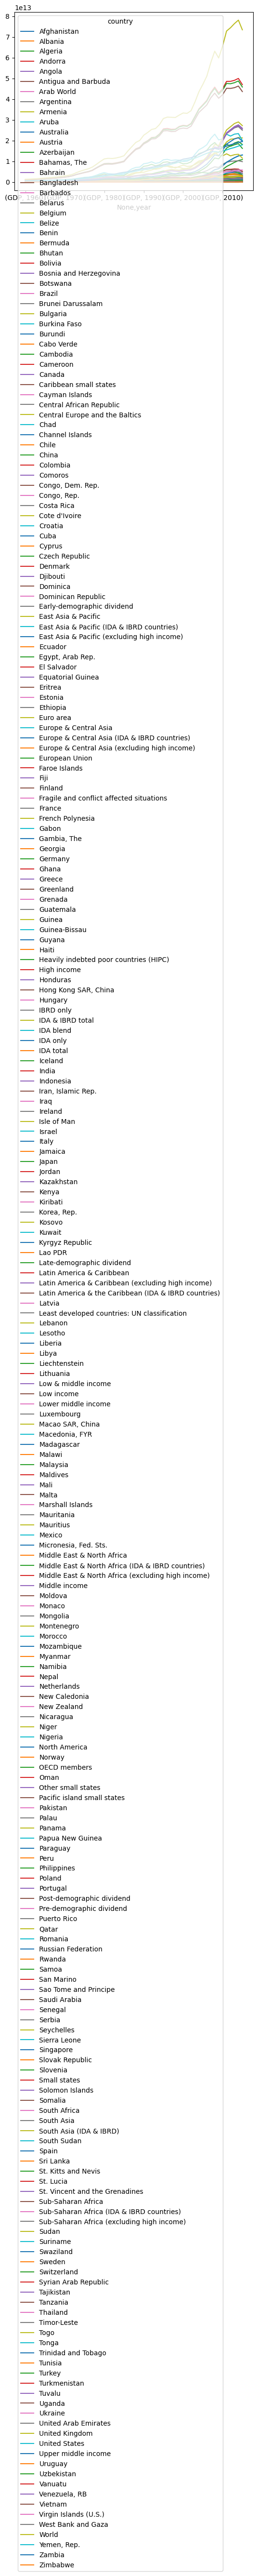

In [77]:
df_pivot.T.plot()

<AxesSubplot: >

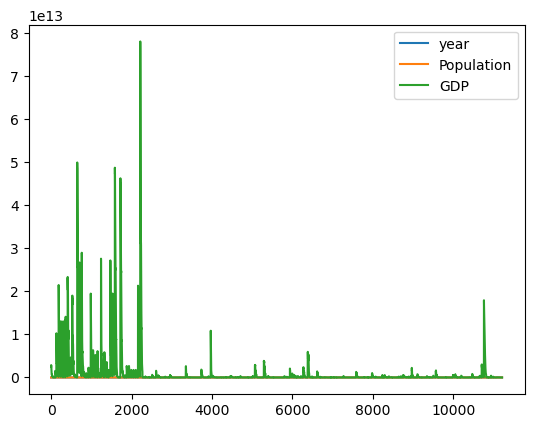

In [79]:
df.plot()

### Stack and Unstack

In pandas, `stack()` and `unstack()` are two methods used to transform data between "wide" and "long" formats in a DataFrame.

- `stack()`: This method "stacks" the data, converting the **columns into rows**, and results in a multi-level index. It is useful when you have a DataFrame with multiple columns representing similar data, and you want to combine them into a single column.

- `unstack()`: This method does the opposite of `stack()`. It "unstacks" the data, converting the **index back into columns**, and results in a more "wide" format. It is useful when you have a DataFrame with multi-level index and you want to separate the levels into separate columns.


![](https://github.com/data-bootcamp-v4/lessons/blob/main/img/stack.png?raw=true)

In [83]:
df_multi = df.set_index(['country', 'year'])

df_multi.head()

Population           GDP
country    year                           
Arab World 2015  392022276.0  2.530102e+12
           2014  384222592.0  2.873600e+12
           2013  376504253.0  2.846994e+12
           2012  368802611.0  2.773270e+12
           2011  361031820.0  2.497945e+12

In [86]:
df_multi.index[:4]

MultiIndex([('Arab World', 2015),
            ('Arab World', 2014),
            ('Arab World', 2013),
            ('Arab World', 2012)],
           names=['country', 'year'])

In [88]:
stacked = df_multi.stack()

stacked

country     year            
Arab World  2015  Population    3.920223e+08
                  GDP           2.530102e+12
            2014  Population    3.842226e+08
                  GDP           2.873600e+12
            2013  Population    3.765043e+08
                                    ...     
Zimbabwe    1962  GDP           1.117602e+09
            1961  Population    3.876638e+06
                  GDP           1.096647e+09
            1960  Population    3.752390e+06
                  GDP           1.052990e+09
Length: 22422, dtype: float64

In [90]:
stacked.unstack().head()

Population           GDP
country     year                          
Afghanistan 1960   8994793.0  5.377778e+08
            1961   9164945.0  5.488889e+08
            1962   9343772.0  5.466667e+08
            1963   9531555.0  7.511112e+08
            1964   9728645.0  8.000000e+08

### Melt

The `melt()` function in pandas is used to transform a DataFrame from a **wide format to a long format**, which is often more suitable for certain data analysis tasks. In the wide format, each row represents a unique observation, and each column represents a different variable. However, in the long format, multiple rows may represent the same observation, and a new column is introduced to distinguish between the different variables.

![](https://github.com/data-bootcamp-v4/lessons/blob/main/img/melt.png?raw=true)

In [98]:
df.head()

,country,year,Population,GDP
0,Arab World,2015,392022276.0,2.530102e+12
1,Arab World,2014,384222592.0,2.873600e+12
2,Arab World,2013,376504253.0,2.846994e+12
3,Arab World,2012,368802611.0,2.773270e+12
4,Arab World,2011,361031820.0,2.497945e+12


In [101]:
df.GDP.head()

0    2.530102e+12
1    2.873600e+12
2    2.846994e+12
3    2.773270e+12
4    2.497945e+12
Name: GDP, dtype: float64

In [103]:
melted = pd.melt(df, id_vars=['country', 'year'], value_vars=['Population', 'GDP'])

melted.head()

,country,year,variable,value
0,Arab World,2015,Population,392022276.0
1,Arab World,2014,Population,384222592.0
2,Arab World,2013,Population,376504253.0
3,Arab World,2012,Population,368802611.0
4,Arab World,2011,Population,361031820.0


In [105]:
melted[melted.variable=='GDP'].head()

,country,year,variable,value
11211,Arab World,2015,GDP,2.530102e+12
11212,Arab World,2014,GDP,2.873600e+12
11213,Arab World,2013,GDP,2.846994e+12
11214,Arab World,2012,GDP,2.773270e+12
11215,Arab World,2011,GDP,2.497945e+12


### Summary

- `pivot` is used to create a new derived table from an existing one by reshaping a DataFrame based on column values and converting unique values from one column into multiple columns.
- `stack` and `unstack` are used to transform data between "wide" and "long" formats.
  - `stack` converts columns into rows, leading to a multi-level index. It's useful when multiple columns represent similar data that you want to combine into a single column.
  - `unstack` does the opposite of `stack`, converting the index back into columns and leading to a more "wide" format. It's useful when a DataFrame has a multi-level index that you want to separate into different columns.
- `melt` transforms a DataFrame from a wide format to a long format. It's useful for certain data analysis tasks where each row represents a unique observation in the wide format, but in the long format, multiple rows represent the same observation, and a new column is introduced to distinguish between different variables.